In [131]:
!pip install pillow

In [132]:
import numpy as np

In [133]:
from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [134]:
import os

#가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path+"/*.jpg")

#파일마다 모두 28x28사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  ./EIP/expolratory_1/scissor_rock_paper/scissor
가위 이미지 resize 완료!


In [135]:
#바위 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path+"/*.jpg")

#파일마다 모두 28x28사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  ./EIP/expolratory_1/scissor_rock_paper/rock
바위 이미지 resize 완료!


In [136]:
#보 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path+"/*.jpg")

#파일마다 모두 28x28사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  ./EIP/expolratory_1/scissor_rock_paper/paper
보 이미지 resize 완료!


In [137]:
def load_data(img_path):
#가위:0, 바위:1, 보:2
    number_of_data=600 #가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위:0, 바위:1, 보:2)데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype= np.int32).reshape(number_of_data, img_size,img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :,:,:]=img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 #가위:0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img #데이터 영억에 이미지 행렬을 복사
        labels[idx]=1 #바위: 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=2 #보: 2
        idx=idx+1

    print( "학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

    
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper"
(x_train, y_train)= load_data(image_dir_path)
x_train_norm = x_train/255.0   #입력은 0-1사이의 값으로 정규화



학습데이터(x_train)의 이미지 개수는 600 입니다.


In [138]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


이미지 불러오기

라벨:  0


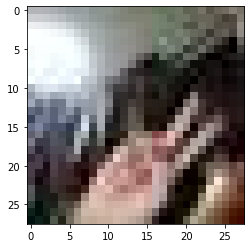

In [139]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [140]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [141]:
model=keras.models.Sequential()

#Sequential API는 개발의 자유도는 많이 떨어지지만
#매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
          
print('Model에 추가된 Layer개수: ',len(model.layers))
          

Model에 추가된 Layer개수:  7


In [142]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                25616     
_________________________________________________________________
dense_27 (Dense)             (None, 3)               

In [143]:
print("Before Reshape - x_train_norm shape:{}".format(x_train_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_train_reshape shape: {}".format(x_train_reshaped.shape))


Before Reshape - x_train_norm shape:(600, 28, 28, 3)
After Reshape - x_train_reshape shape: (600, 28, 28, 3)


In [144]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
19/19 [==============================] - 0s 16ms/step - loss: 1.0791 - accuracy: 0.3800
Epoch 2/20
19/19 [==============================] - 0s 17ms/step - loss: 0.9890 - accuracy: 0.5817
Epoch 3/20
19/19 [==============================] - 0s 16ms/step - loss: 0.8532 - accuracy: 0.6450
Epoch 4/20
19/19 [==============================] - 0s 16ms/step - loss: 0.6781 - accuracy: 0.7217
Epoch 5/20
19/19 [==============================] - 0s 17ms/step - loss: 0.5406 - accuracy: 0.8000
Epoch 6/20
19/19 [==============================] - 0s 17ms/step - loss: 0.4280 - accuracy: 0.8500
Epoch 7/20
19/19 [==============================] - 0s 16ms/step - loss: 0.3621 - accuracy: 0.8700
Epoch 8/20
19/19 [==============================] - 0s 15ms/step - loss: 0.3162 - accuracy: 0.8817
Epoch 9/20
19/19 [==============================] - 0s 17ms/step - loss: 0.2695 - accuracy: 0.9033
Epoch 10/20
19/19 [==============================] - 0s 16ms/step - loss: 0.2119 - accuracy: 0.9333
Epoch 11/

테스트데이터

In [145]:
#테스트 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path+"/*.jpg")

#파일마다 모두 28x28사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("테스트 가위 이미지 resize 완료!")

이미지 디렉토리 경로:  ./EIP/expolratory_1/scissor_rock_paper/test/scissor
테스트 가위 이미지 resize 완료!


In [146]:
#테스트 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path+"/*.jpg")

#파일마다 모두 28x28사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("테스트 바위 이미지 resize 완료!")

이미지 디렉토리 경로:  ./EIP/expolratory_1/scissor_rock_paper/test/rock
테스트 바위 이미지 resize 완료!


In [147]:
#테스트 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path+"/*.jpg")

#파일마다 모두 28x28사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
print("테스트 보 이미지 resize 완료!")

이미지 디렉토리 경로:  ./EIP/expolratory_1/scissor_rock_paper/test/paper
테스트 보 이미지 resize 완료!


In [148]:
def load_data(img_path):
#가위:0, 바위:1, 보:2
    number_of_data=30 #가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위:0, 바위:1, 보:2)데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype= np.int32).reshape(number_of_data, img_size,img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :,:,:]=img #데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 #가위:0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img #데이터 영억에 이미지 행렬을 복사
        labels[idx]=1 #바위: 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=2 #보: 2
        idx=idx+1

    print( "학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

    
image_dir_path = "./EIP/expolratory_1/scissor_rock_paper/test"
(x_test, y_test)= load_data(image_dir_path)
x_test_norm = x_test/255.0   #입력은 0-1사이의 값으로 정규화


학습데이터(x_test)의 이미지 개수는 30 입니다.


In [149]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (30, 28, 28, 3)
y_test shape: (30,)


라벨:  0


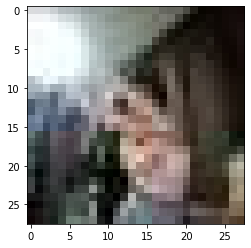

In [150]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [151]:
print("Before Reshape - x_test_norm shape:{}".format(x_test_norm.shape))

x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

print("After Reshape - x_test_reshape shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_test_norm shape:(30, 28, 28, 3)
After Reshape - x_test_reshape shape: (30, 28, 28, 3)


얼마나 잘 만들었는지 확인하기

In [152]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

print("test_loss: {}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

1/1 - 0s - loss: 0.6674 - accuracy: 0.7000
test_loss: 0.6673905849456787
test_accuracy:0.699999988079071


더 좋은 네트워크 만들어 보기

In [161]:
#바꿔 볼 수 있는 하이퍼 파라미터들
n_channel_1 =32
n_channel_2 =64
n_dense=16
n_train_epoch=20

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (5,5), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2,(5,5), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#모델훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

#모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test,verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
flatten_23 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 16)                65552     
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 51        
Total params: 119,299
Trainable params: 119,299
Non-trainable params: 0
_______________________________________________